In [ ]:
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt

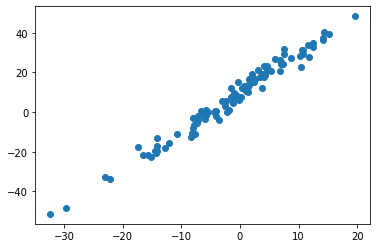

In [ ]:
X = torch.randn(100, 1)*10
y = 2 * X + 3 * torch.randn(100, 1) + 10 
plt.plot(X.numpy(), y.numpy(), 'o')

In [ ]:
class LinearRegress(nn.Module):
  def __init__(self):
    super().__init__()
    #self.w = torch.randn(1, 1, requires_grad=True)
    #self.b = torch.randn(1, 1, requires_grad=True)
    self.linear = nn.Linear(1, 1)


  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

  def get_loss(self, y_pred, y):
    S = (y_pred - y).pow(2).sum() / len(y_pred)
    return S

  def get_params(self):               # w,b 2 parameteruud herhen uurchlugduj bgag harah
    [w, b] = model.parameters()
    return w.item(), b.item()
  
  def plot_model(self, x, y):
    w, b = self.get_params()
    plt.scatter(X,y)
    x_1 = np.array([-30,30])
    y_1 = w*x_1 + b
    plt.plot(x_1, y_1, 'r')
    plt.show()

In [ ]:
model = LinearRegress()
model
[w, b] = model.parameters()
print(w, b)

Parameter containing:
tensor([[0.2319]], requires_grad=True) Parameter containing:
tensor([-0.0079], requires_grad=True)


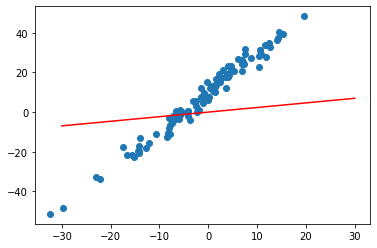

In [ ]:
model.plot_model(X, y)

In [ ]:
y_pred = model.forward(X)
print(X[:5])
print(y_pred[:5])

tensor([[ 4.5953],
        [12.4480],
        [ 2.0909],
        [ 8.7499],
        [ 7.4508]])
tensor([[-3.3961],
        [-8.9932],
        [-1.6111],
        [-6.3574],
        [-5.4314]], grad_fn=<SliceBackward>)


0 353.58660888671875


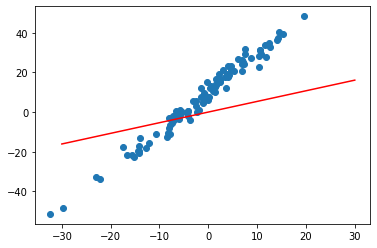

100 75.63618469238281


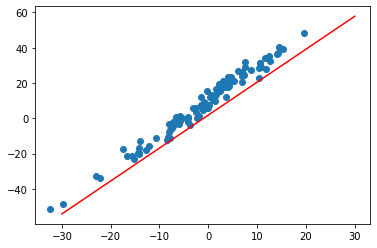

200 53.9040412902832


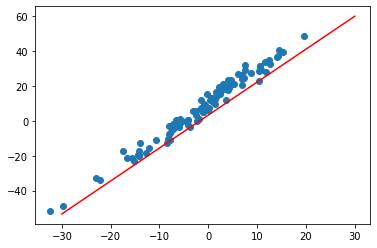

300 39.252113342285156


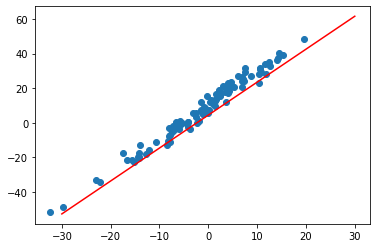

400 29.37371063232422


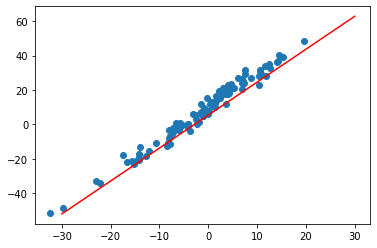

500 22.7136287689209


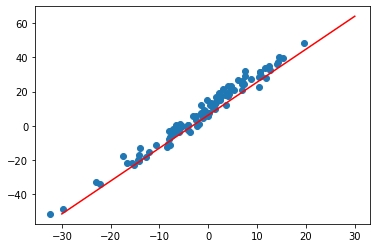

600 18.223352432250977


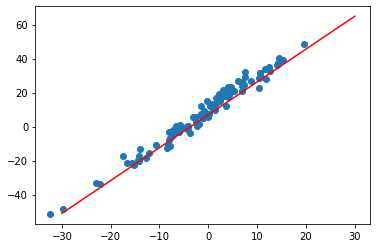

700 15.195993423461914


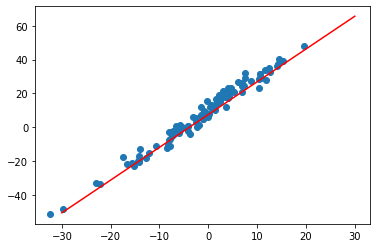

800 13.154925346374512


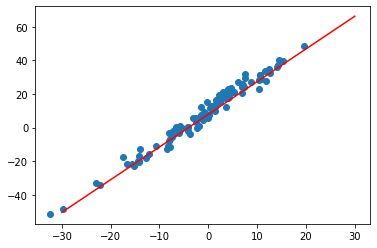

900 11.778829574584961


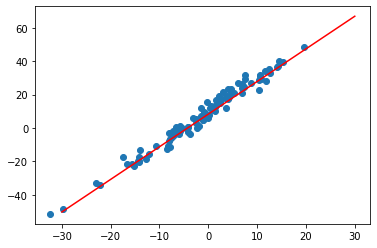

In [ ]:
# # Загвараа сургая
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

epoch = 1000
losses = list()

for i in range(epoch):
   #grad_w, grad_b = model.get_grad(X, y)
   #model.backward(grad_w, grad_b)
   #loss = model.get_loss(X, y)
   #losses.append(loss)

   y_pred = model.forward(X)
   S = model.get_loss(y_pred, y)
   optimizer.zero_grad()
   S.backward()
   optimizer.step()

   losses.append(S.item())

   if i % 100 == 0:
     print(i, S.item())
     model.plot_model(X, y)

 #model.get_params()
 # Алдаа (loss)-аа зурж үзье. 
 #plt.plot(range(epoch), losses)
 #plt.ylabel("Loss")
 #plt.xlabel("Epoch")
 #plt.show()